# Project 1 - Franke function

Franke function:

$$f(x,y)=\dfrac{3}{4}\cdot \exp\left[ - \dfrac{(9x-2)^2}{4} - \dfrac{(9y-2)^2}{4} \right] + \dfrac{3}{4}\cdot \exp\left[ - \dfrac{(9x+1)^2}{49} - \dfrac{(9y+1)^2}{10} \right] + \dfrac{1}{2}\cdot \exp\left[ - \dfrac{(9x-7)^2}{4} - \dfrac{(9y-3)^2}{4} \right] - \dfrac{1}{5}\cdot \exp\left[ - (9x-4)^2 -(9y-7)^2\right]$$

defined for: $x,y \in [0,1]$.

1. Regression models:
    1. Ordinary Least Squares
    2. Ridge


2. Resampling techniques:
    1. Bootstrap method
    2. Cross validation


3. Study of Bias-Variance trade off

# Python code for Franke function

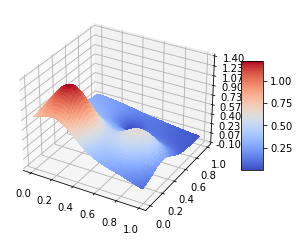

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Part a) OLS

Perform a standard least square regression analysis using polynomials in $x$ and $y$ up to fifth order. 

Find the confidence intervals of the parameters (estimators) $\beta$ by computing their variances, evaluate the Mean Squared error (MSE) and the R2
score function.

In [2]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

### SPLIT OF THE DATA

#### Define the x, y values

In [3]:
from sklearn.model_selection import train_test_split

#Values for x,y
x = np.round(np.arange(0,1,0.05),3)

xy_val = np.zeros((len(x)**2,2))      #2D array where 0-row values are x-values and 1-row are y-values
z_val = np.zeros(len(x)**2)           #1D array with z-values associated to Franke function

#Values for xy-array
L,R=0,0
for i in range(len(x)**2):    
    xy_val[i,1]=x[L]
    xy_val[i,0]=x[R]
    R+=1
    if int(R) == 20:
        L+=1
        R=0
z_val = FrankeFunction(xy_val[:,0],xy_val[:,1])

#### Splitting with skilearn library

In [4]:
xy_train, xy_test, z_train, z_test = train_test_split(xy_val, z_val, test_size=0.2)

x_train, x_test = xy_train[:,0], xy_test[:,0]
y_train, y_test = xy_train[:,1], xy_test[:,1]
z_train, z_test = FrankeFunction(x_train, y_train), FrankeFunction(x_test, y_test)

#### Splitting from scratch

In [5]:
#Algorithm for splitting the data between test (10%) and train (80%)

#1st. Generate the position for the values we pop from the array to create the test values
test_frac=1/5
test_pos=[]
train_pos=list(range(len(z_val)))

while len(test_pos)<len(z_val)*test_frac:
    random_pos = np.random.randint(0,len(z_val))
    if random_pos not in test_pos:
        test_pos.append(random_pos)
        train_pos.remove(random_pos)
        
#Sort of the values for the indexes
test_pos=np.sort(np.array(test_pos))
train_pos=np.sort(np.array(train_pos))

#2nd. Split between the train:
xy_train, xy_test = [], []
for i in test_pos:
    xy_test.append(xy_val[i,:])
    
#and test data:
for i in train_pos:
    xy_train.append(xy_val[i,:])
xy_test, xy_train = np.array(xy_test), np.array(xy_train)

#3rd. Get the values for the Franke function
z_test, z_train = FrankeFunction(xy_test[:,0], xy_test[:,1]), FrankeFunction(xy_train[:,0],xy_train[:,1])

# 

#### Fitting to a 5-degree polynomial

##### 5 degree polynomial

$$p(x,y) = a_{00} \cdot x^0 \cdot y^0 + a_{01} \cdot x^0 \cdot y^1 + a_{02} \cdot x^0 \cdot y^2 + a_{03} \cdot x^0 \cdot y^3 + a_{04} \cdot x^0 \cdot y^4 + a_{05} \cdot x^0 \cdot y^5 + a_{10} \cdot x^1 \cdot y^0 + a_{11} \cdot x^1 \cdot y^1 + a_{12} \cdot x^1 \cdot y^2 + a_{13} \cdot x^1 \cdot y^3 + a_{14} \cdot x^1 \cdot y^4 + a_{20} \cdot x^2 \cdot y^0 + a_{21} \cdot x^2 \cdot y^1 + a_{22} \cdot x^2 \cdot y^2 + a_{23} \cdot x^2 \cdot y^3 + a_{30} \cdot x^3 \cdot y^0 + a_{31} \cdot x^3 \cdot y^1 + a_{32} \cdot x^3 \cdot y^2 + a_{40} \cdot x^4 \cdot y^0 + a_{41} \cdot x^4 \cdot y^1 + a_{50} \cdot x^5 \cdot y^0$$

rewritten as

$$p(x,y) = a_{00} + a_{01} \cdot y + a_{02} \cdot y^2 + a_{03} \cdot y^3 + a_{04} \cdot y^4 + a_{05} \cdot y^5 + a_{10} \cdot x + a_{11} \cdot x \cdot y + a_{12} \cdot x \cdot y^2 + a_{13} \cdot x \cdot y^3 + a_{14} \cdot x \cdot y^4 + a_{20} \cdot x^2  + a_{21} \cdot x^2 \cdot y + a_{22} \cdot x^2 \cdot y^2 + a_{23} \cdot x^2 \cdot y^3 + a_{30} \cdot x^3 + a_{31} \cdot x^3 \cdot y + a_{32} \cdot x^3 \cdot y^2 + a_{40} \cdot x^4 + a_{41} \cdot x^4 \cdot y + a_{50} \cdot x^5$$


Therefore, the design matrix X has a dimension of $400\times21$.

### Design matrix taking all the data

In [6]:
X_matrix = np.ones((400,21))

k=0
for i in range(0,6):
    for j in range(0,6):
        if i+j<6:
            X_matrix[:,k]=(xy_val[:,0]**i)*(xy_val[:,1]**j)
            k+=1

In [7]:
#Beta values with all data
beta_all=(np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ z_val)

In [8]:
beta_all

array([  0.54816337,   2.99559795,  -5.96536511, -14.08913346,
        36.40198928, -19.78809638,   5.74654984, -11.2601328 ,
        18.50345617, -31.71166945,  18.508273  , -24.03100582,
        33.66372883,  -1.189173  ,  -5.92131254,  25.93438392,
       -42.65810161,   6.62934981,  -0.90760654,  15.88544529,
        -7.37090175])

### Desing matrices and beta obtained with train data

In [9]:
X_train_matrix = np.ones((320,21))
X_test_matrix = np.ones((80,21))

In [10]:
k=0
for i in range(0,6):
    for j in range(0,6):
        if i+j<6:
            X_train_matrix[:,k]=(xy_train[:,0]**i)*(xy_train[:,1]**j)
            X_test_matrix[:,k]=(xy_test[:,0]**i)*(xy_test[:,1]**j)
            k+=1

In [11]:
#Beta values with train data
beta=(np.linalg.inv(X_train_matrix.T @ X_train_matrix) @ X_train_matrix.T @ z_train)

In [12]:
beta

array([  0.58128889,   2.51728185,  -3.71964702, -18.45556963,
        40.15283097, -20.96458822,   5.59077663, -10.23183831,
        15.21112874, -27.95076556,  17.0925571 , -23.69133213,
        32.95469932,   0.50086226,  -6.83332597,  25.9158749 ,
       -42.77769112,   6.31457526,  -1.57198373,  16.19294824,
        -6.90026832])

### Calculation of MSE and R2 just with test data

In [13]:
#1st. We get the model data

z_model = X_test_matrix @ beta

#2nd. We get the MSE and R2 values
MSE_test, R2_test = MSE(z_test,z_model), R2(z_test,z_model)